<a href="https://colab.research.google.com/github/KC-ai/APPM4600/blob/main/NumericsRec10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import math
from scipy.integrate import quad

In [4]:
def eval_legendre(n, x):
    p = np.zeros(n + 1)
    p[0] = 1.0
    if n > 0:
        p[1] = x
    for k in range(1, n):
        p[k + 1] = ((2*k + 1)*x*p[k] - k*p[k-1]) / (k+1)
    return p

In [5]:
def eval_legendre_expansion(f, a, b, w, n, x):
    p = eval_legendre(n, x)
    pval = 0.0

    def legendre_poly(j, x_val):
        if j == 0:
            return 1.0
        elif j == 1:
            return x_val
        else:
            p0 = 1.0
            p1 = x_val
            for k in range(1, j):
                p_next = ((2*k + 1)*x_val*p1 - k*p0) / (k+1)
                p0, p1 = p1, p_next
            return p1

    for j in range(n+1):
        phi_j = lambda x_val, j=j: legendre_poly(j, x_val)

        phi_j_sq = lambda x_val, j=j: (legendre_poly(j, x_val)**2) * w(x_val)
        norm_fac, norm_err = quad(phi_j_sq, a, b)

        integrand = lambda x_val, j=j: phi_j(x_val) * f(x_val) * w(x_val)
        a_j, coeff_err = quad(integrand, a, b)
        a_j /= norm_fac

        pval += a_j * p[j]

    return pval

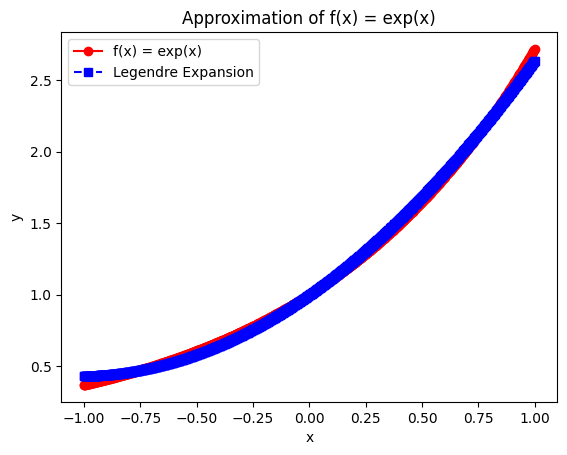

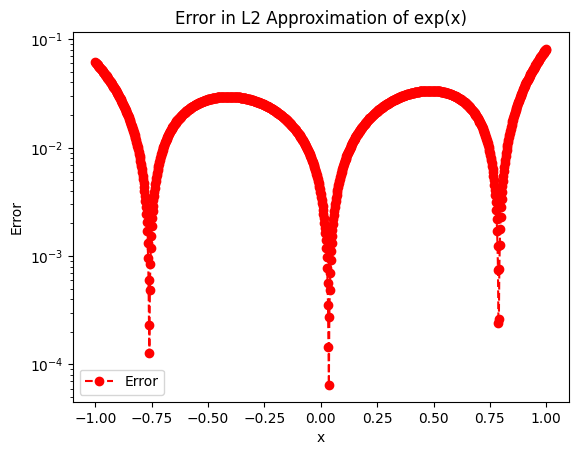

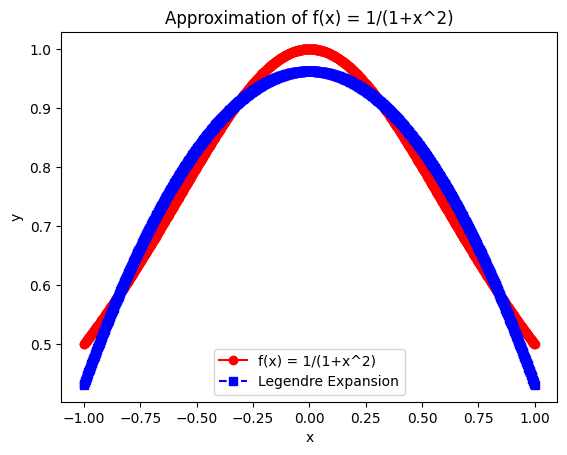

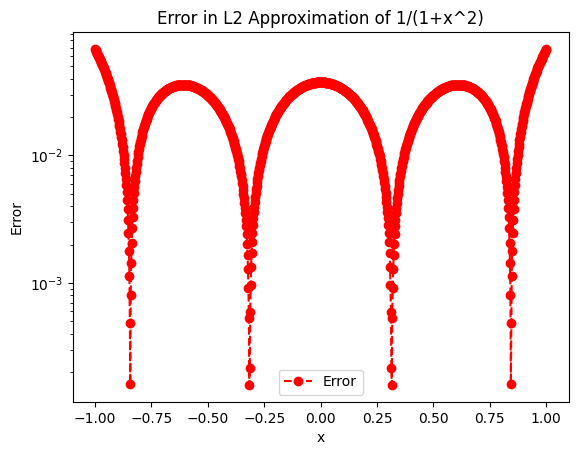

In [6]:
def driver():
    f = lambda x: math.exp(x)
    a = -1
    b = 1
    w = lambda x: 1.0
    n = 2
    N = 1000

    xeval = np.linspace(a, b, N+1)
    pval = np.zeros(N+1)

    for kk in range(N+1):
        pval[kk] = eval_legendre_expansion(f, a, b, w, n, xeval[kk])

    fex = np.array([f(x) for x in xeval])

    plt.figure()
    plt.plot(xeval, fex, 'ro-', label='f(x) = exp(x)')
    plt.plot(xeval, pval, 'bs--', label='Legendre Expansion')
    plt.legend()
    plt.title('Approximation of f(x) = exp(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    err = np.abs(pval - fex)
    plt.figure()
    plt.semilogy(xeval, err, 'ro--', label='Error')
    plt.legend()
    plt.title('Error in L2 Approximation of exp(x)')
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.show()


    f_new = lambda x: 1 / (1 + x**2)
    pval_new = np.zeros(N+1)

    for kk in range(N+1):
        pval_new[kk] = eval_legendre_expansion(f_new, a, b, w, n, xeval[kk])

    fex_new = np.array([f_new(x) for x in xeval])

    plt.figure()
    plt.plot(xeval, fex_new, 'ro-', label='f(x) = 1/(1+x^2)')
    plt.plot(xeval, pval_new, 'bs--', label='Legendre Expansion')
    plt.legend()
    plt.title('Approximation of f(x) = 1/(1+x^2)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    err_new = np.abs(pval_new - fex_new)
    plt.figure()
    plt.semilogy(xeval, err_new, 'ro--', label='Error')
    plt.legend()
    plt.title('Error in L2 Approximation of 1/(1+x^2)')
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.show()

if __name__ == '__main__':
    driver()


The accuracy of the function does change since the second function (1/ (1+x^2)) is easier to capture than e^x since its lower degree